In [1]:
!pip install download

In [2]:
!pip install fbprophet

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from download import download


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [4]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:00<00:00, 53.9MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [5]:
!ls /tmp/aq/PRSA_Data_20130301-20170228

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [6]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [7]:
aq_df_sh = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [8]:
aq_df_wa = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [9]:
aq_df_gu = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [10]:
aq_df = pd.concat([aq_df_sh, aq_df_wa,aq_df_gu], ignore_index=True, sort=False)

In [11]:
aq_df

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [12]:
aq_df = aq_df.drop(['No'], axis=1)

In [13]:
aq_df

,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [14]:
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [15]:
aq_df

PM2.5        PM10  ...  RAIN      WSPM
station year_month_day_hour                          ...                
Gucheng 2013-03-01             8.625000   16.875000  ...   0.0  2.350000
        2013-03-02            36.916667   51.375000  ...   0.0  1.087500
        2013-03-03            80.333333  120.041667  ...   0.0  1.400000
        2013-03-04            26.500000   51.291667  ...   0.0  1.541667
        2013-03-05           136.708333  172.541667  ...   0.0  0.841667
...                                 ...         ...  ...   ...       ...
Wanliu  2017-02-24            21.458333   39.666667  ...   0.0  1.262500
        2017-02-25             8.250000   21.166667  ...   0.0  1.466667
        2017-02-26            27.125000   44.583333  ...   0.0  1.562500
        2017-02-27            64.000000   95.916667  ...   0.0  1.316667
        2017-02-28             9.958333   25.583333  ...   0.0  1.800000

[4383 rows x 11 columns]

In [16]:
aq_df = aq_df.reset_index()

In [17]:
aq_df

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Wanliu,2017-02-24,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
4379,Wanliu,2017-02-25,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
4380,Wanliu,2017-02-26,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500
4381,Wanliu,2017-02-27,64.000000,95.916667,17.869565,89.826087,1643.478261,17.136364,7.220833,1015.554167,-6.333333,0.0,1.316667


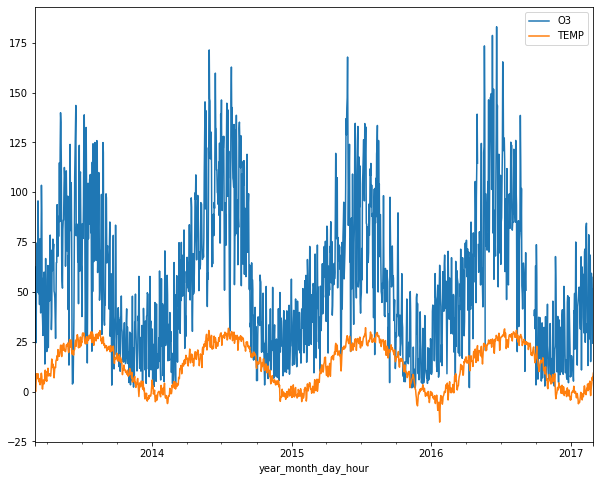

In [18]:
aq_df.set_index('year_month_day_hour').query("station=='Shunyi'")[['O3','TEMP']].plot()

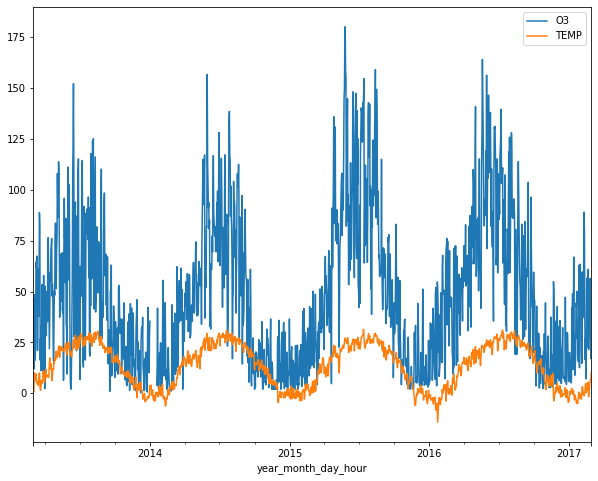

In [19]:
aq_df.set_index('year_month_day_hour').query("station=='Wanliu'")[['O3','TEMP']].plot()

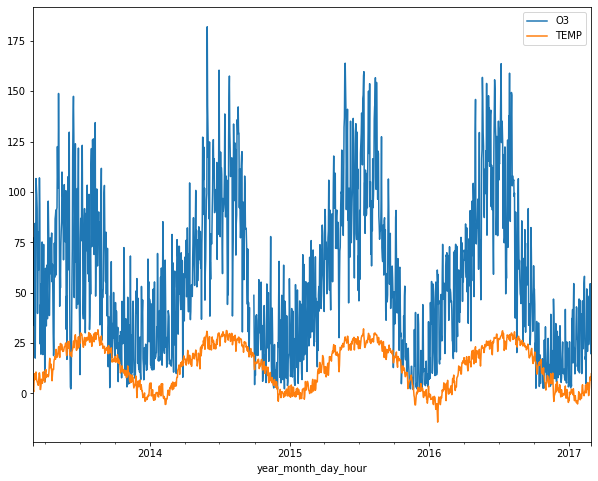

In [20]:
aq_df.set_index('year_month_day_hour').query("station=='Gucheng'")[['O3','TEMP']].plot()

station
Gucheng    AxesSubplot(0.125,0.125;0.775x0.755)
Shunyi     AxesSubplot(0.125,0.125;0.775x0.755)
Wanliu     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

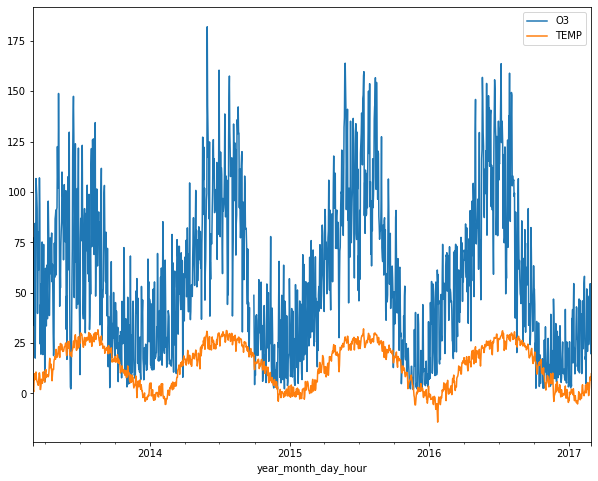

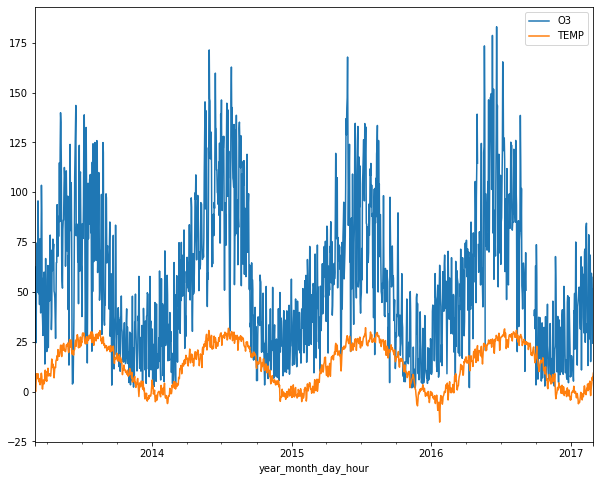

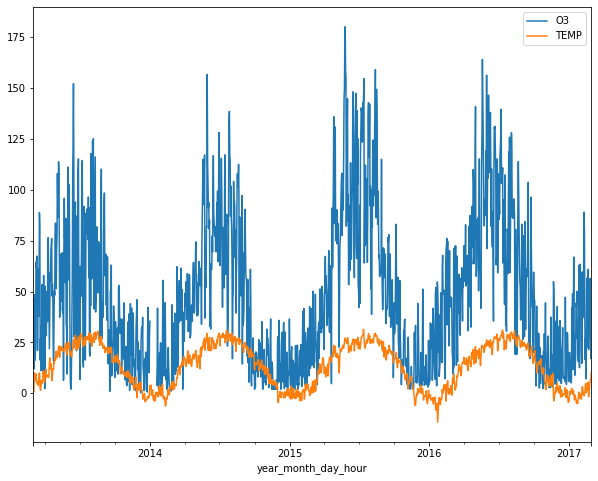

In [21]:
aq_df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot()

In [22]:
aq_df

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Wanliu,2017-02-24,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
4379,Wanliu,2017-02-25,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
4380,Wanliu,2017-02-26,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500
4381,Wanliu,2017-02-27,64.000000,95.916667,17.869565,89.826087,1643.478261,17.136364,7.220833,1015.554167,-6.333333,0.0,1.316667


In [23]:
aq_df['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [24]:
from fbprophet import Prophet

In [25]:
aq_df_final=aq_df[['year_month_day_hour','O3','TEMP','station']].rename({'year_month_day_hour':'ds','O3':'y'}, axis='columns')

In [26]:
aq_df_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [27]:
stations = aq_df_final.groupby('station')

In [28]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [29]:
for station in stations.groups:
    group = stations.get_group(station)
    train=group[(group['ds'] >= '2013-03-01') & (group['ds'] <= '2016-02-28')]
    test=group[(group['ds'] > '2016-02-28')]
    print(test.shape)

(366, 4)
(366, 4)
(366, 4)


In [30]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


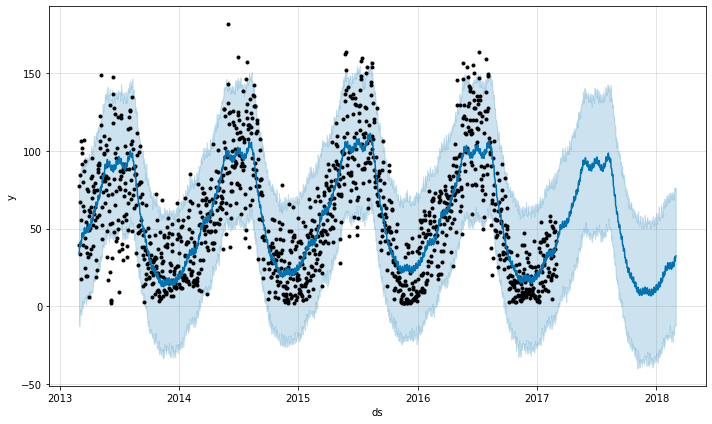

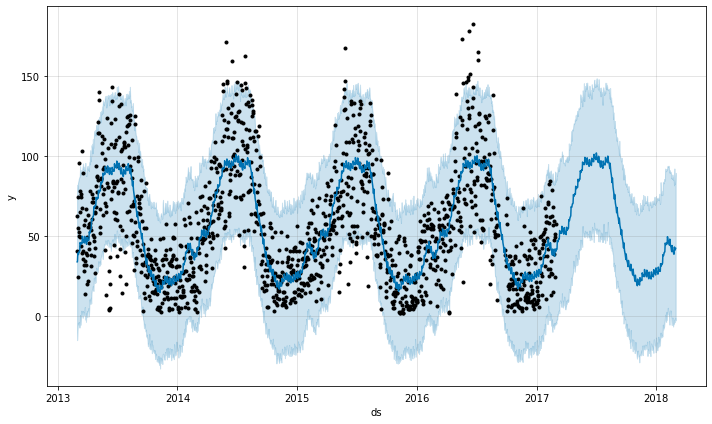

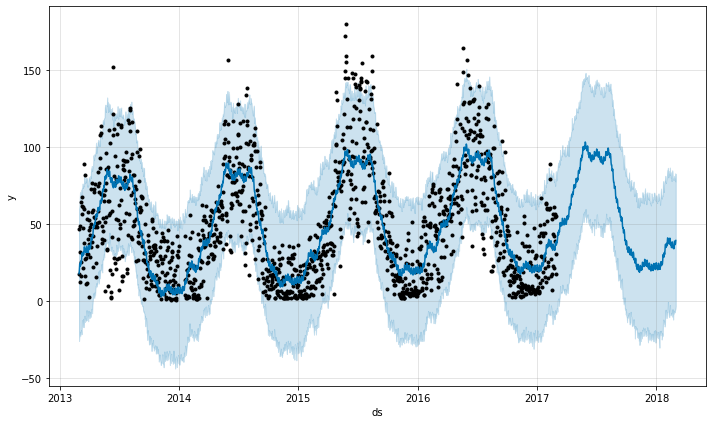

In [31]:
for station in stations.groups:
    group = stations.get_group(station)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=366)
    forecast = m.predict(future)  
    m.plot(forecast)  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [32]:
target

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,weekly_upper_x,yearly_x,yearly_lower_x,yearly_upper_x,multiplicative_terms_x,multiplicative_terms_lower_x,multiplicative_terms_upper_x,yhat_Gucheng,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,weekly_y,weekly_lower_y,weekly_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yhat_Shunyi,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.061472,-7.539380,76.513333,49.061472,49.061472,-15.178419,-15.178419,-15.178419,-1.940920,-1.940920,-1.940920,-13.237498,-13.237498,-13.237498,0.0,0.0,0.0,33.883054,50.959672,-15.198935,81.816709,50.959672,50.959672,-17.153797,-17.153797,-17.153797,-1.301724,-1.301724,-1.301724,-15.852073,-15.852073,-15.852073,0.0,0.0,0.0,33.805875,36.979562,-26.112600,59.619780,36.979562,36.979562,-19.299347,-19.299347,-19.299347,-1.924910,-1.924910,-1.924910,-17.374437,-17.374437,-17.374437,0.0,0.0,0.0,17.680214
2013-03-02,49.076510,-12.958849,82.773430,49.076510,49.076510,-13.112986,-13.112986,-13.112986,-0.800816,-0.800816,-0.800816,-12.312170,-12.312170,-12.312170,0.0,0.0,0.0,35.963523,50.971225,-10.152898,78.285334,50.971225,50.971225,-16.827978,-16.827978,-16.827978,-1.746996,-1.746996,-1.746996,-15.080982,-15.080982,-15.080982,0.0,0.0,0.0,34.143246,36.991838,-23.518358,61.523665,36.991838,36.991838,-16.969470,-16.969470,-16.969470,-0.469570,-0.469570,-0.469570,-16.499900,-16.499900,-16.499900,0.0,0.0,0.0,20.022368
2013-03-03,49.091547,-6.315827,83.436859,49.091547,49.091547,-9.348828,-9.348828,-9.348828,2.014556,2.014556,2.014556,-11.363384,-11.363384,-11.363384,0.0,0.0,0.0,39.742719,50.982777,-4.307515,82.377120,50.982777,50.982777,-11.674839,-11.674839,-11.674839,2.563092,2.563092,2.563092,-14.237930,-14.237930,-14.237930,0.0,0.0,0.0,39.307939,37.004115,-20.017546,67.042583,37.004115,37.004115,-13.156604,-13.156604,-13.156604,2.408049,2.408049,2.408049,-15.564653,-15.564653,-15.564653,0.0,0.0,0.0,23.847511
2013-03-04,49.106584,-1.970681,85.683717,49.106584,49.106584,-8.097573,-8.097573,-8.097573,2.304908,2.304908,2.304908,-10.402481,-10.402481,-10.402481,0.0,0.0,0.0,41.009012,50.994330,-5.696844,83.568199,50.994330,50.994330,-12.215718,-12.215718,-12.215718,1.123016,1.123016,1.123016,-13.338734,-13.338734,-13.338734,0.0,0.0,0.0,38.778612,37.016392,-22.469837,70.609794,37.016392,37.016392,-12.652954,-12.652954,-12.652954,1.931001,1.931001,1.931001,-14.583956,-14.583956,-14.583956,0.0,0.0,0.0,24.363437
2013-03-05,49.121622,-5.974483,86.705468,49.121622,49.121622,-10.726403,-10.726403,-10.726403,-1.285321,-1.285321,-1.285321,-9.441081,-9.441081,-9.441081,0.0,0.0,0.0,38.395219,51.005883,-5.417143,84.617967,51.005883,51.005883,-12.576039,-12.576039,-12.576039,-0.175695,-0.175695,-0.175695,-12.400344,-12.400344,-12.400344,0.0,0.0,0.0,38.429844,37.028668,-22.716685,68.227076,37.028668,37.028668,-14.514741,-14.514741,-14.514741,-0.940680,-0.940680,-0.940680,-13.574061,-13.574061,-13.574061,0.0,0.0,0.0,22.513927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,45.438086,-12.766716,76.423870,42.892094,48.259657,-14.661164,-14.661164,-14.661164,2.014556,2.014556,2.014556,-16.675719,-16.675719,-16.675719,0.0,0.0,0.0,30.776922,58.577288,-3.184162,92.311341,56.987265,60.230362,-15.471152,-15.471152,-15.471152,2.563092,2.563092,2.563092,-18.034243,-18.034243,-1

In [33]:
target = target[['yhat_' + station for station in stations.groups.keys()]]

In [34]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.883054,33.805875,17.680214
2013-03-02,35.963523,34.143246,20.022368
2013-03-03,39.742719,39.307939,23.847511
2013-03-04,41.009012,38.778612,24.363437
2013-03-05,38.395219,38.429844,22.513927
...,...,...,...
2018-02-25,30.776922,43.106136,38.769491
2018-02-26,31.762159,42.002174,38.781727
2018-02-27,28.929106,41.157130,36.504881


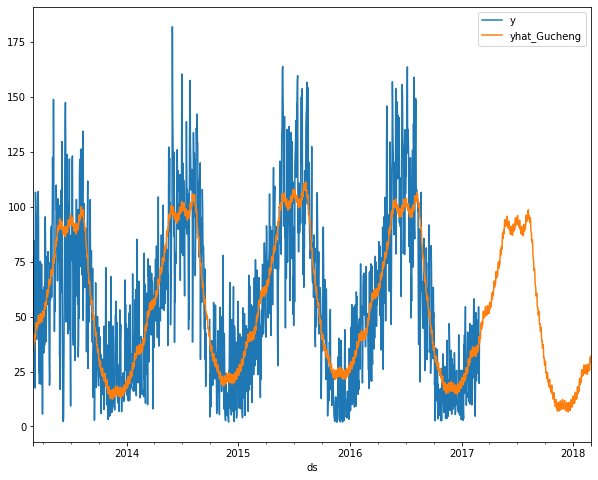

In [35]:
pd.concat([aq_df_final.set_index('ds').query("station=='Gucheng'")['y'],target['yhat_Gucheng']],axis=1).plot()

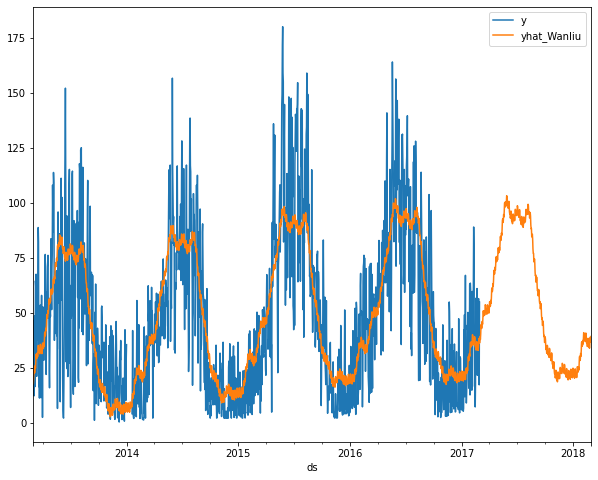

In [36]:
pd.concat([aq_df_final.set_index('ds').query("station=='Wanliu'")['y'],target['yhat_Wanliu']],axis=1).plot()